Logistic Regressions, K-Nearest Neighbors and Naive Bayes Classifier
Logistic Regressions
All the above regression techniques we learnt were for numerical data, but now we’re going to learn a technique called Logistical Regression used for predicting binary outcomes and more usefully, working with ordinal/binary data.

It’s very effective, and reasonably intuitive at first glance. But you can go very deep in trying to extract more insight with this regression output.

Let’s give it a try!

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pylab as pl
%pylab inline

admit = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
admit.head()


C:\Users\edwin\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [2]:
pd.crosstab(admit['admit'],admit['gre'],rownames = ['change'])
# pd.crosstab(admit['gpa'],admit['admit'])

gre,220,300,340,360,380,400,420,440,460,480,...,620,640,660,680,700,720,740,760,780,800
change,,,,,,,,,,,,,,,,,,,,,
0,1,2,3,4,8,9,7,8,10,10,...,18,16,12,11,17,8,7,1,1,14
1,0,1,1,0,0,2,0,2,4,6,...,12,5,12,9,5,3,4,4,4,11


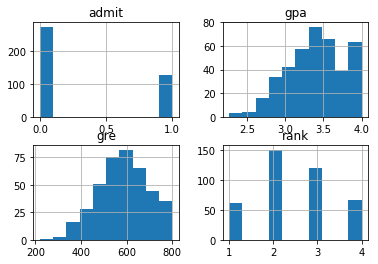

In [3]:
admit.hist()
pl.show()

To perform logistical regressions, we have to use dummy variables. Let’s use all the columns we have at our disposal and our Y (what we will be predicting) will be admit (which has values 1 or 0).

Performing logistical regresions are actually very simple in python (surprise!).



In [4]:
dummies = pd.get_dummies(admit['rank'],prefix = 'rank')
dummies.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [5]:
admit = admit[['admit', 'gre', 'gpa']]
final_df = admit.join(dummies.ix[:, 'rank_1':])
final_df['intercept'] = 1.0 # have to add intercept since logistic regression doesn't know how to add it
cols = ['gre','gpa','rank_1','rank_2','rank_3','rank_4','intercept']    

C:\Users\edwin\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [6]:
logit = sm.Logit(final_df['admit'],final_df[cols]) 
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 7


In [7]:
 result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Oct 2017   Pseudo R-squ.:                 0.08292
Time:                        02:32:52   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
rank_1        -0.0846   1.22e+07  -6.95e-09      1.000   -2.39e+07    2.39e+07
rank_2        -0.7600   1.22e+07  -6.24e-08      1.000   -2.39e+07    2.39e+07
rank_3        -1.4248   1.22e+07  -1.17e-07      1.000   -2.39e+07    2.39e+07
rank_4        -1.6360   1.22e+07  -1.34e-07      1.000   -2.39e+07    2.39e+07
intercept     -3.9054   1.22e+07  -3.21e-07      1.000   -2.39e+07    2.39e+07
==============================================================================
"""

In [8]:
result.conf_int()

,0,1
gre,1.202298e-04,4.408622e-03
gpa,1.536837e-01,1.454391e+00
rank_1,-2.386647e+07,2.386647e+07
rank_2,-2.386647e+07,2.386647e+07
rank_3,-2.386647e+07,2.386647e+07
rank_4,-2.386647e+07,2.386647e+07
intercept,-2.386648e+07,2.386647e+07


In [9]:
np.exp(result.params) #take exponential value

gre          1.002267
gpa          2.234545
rank_1       0.918904
rank_2       0.467659
rank_3       0.240562
rank_4       0.194750
intercept    0.020133
dtype: float64

K-Nearest Neigbours Collaborative Filtering, similar to KNN, KNN use eucidean distance, it uses cosine distance

In [10]:
import pandas as pd
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('\Users\edwin\Desktop\Data Science\Accelerate\ml-100k\u.data',sep='\t', names=r_cols, usecols=range(3))
ratings.head()
# ratings.dtypes

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [11]:
import numpy as np
# We're grouping everything by movie id and seeing their average rating and the number of ratings the movies has
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [15]:
''' Raw ratings won't float our boat, so we're going to go normalise these ratings in the way shown below.
    Value of 0 == no one has rated it, and value of 1 means it's the most popular movie there is'''

movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNumRatings.head()
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))) # standization using range
movieNormalizedNumRatings.head()


,size
movie_id,
1,0.774914
2,0.223368
3,0.152921
4,0.357388
5,0.146048


Now, let’s get the genre information from the u.item file. The way this works is there are 19 fields, each corresponding to a specific genre - a value of ‘0’ means it is not in that genre, and ‘1’ means it is in that genre. A movie may have more than one genre associated with it.

While we’re at it, we’ll put together everything into one big Python dictionary called movieDict. Each entry will contain the movie name, list of genre values, the normalized popularity score, and the average rating for each movie:

In [16]:
movieDict = {}
with open('\Users\edwin\Desktop\Data Science\Accelerate\ml-100k\u.item', 'r') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
#         movieNormalizedNumRatings
        
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))

In [17]:
movieDict[1]

('Toy Story (1995)',
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.77491408934707906,
 3.8783185840707963)

In [18]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1] # movieDict[2][1] for example
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance
    
ComputeDistance(movieDict[2], movieDict[4])


0.80068728522336763

Remember the higher the distance, the less similar the movies are.



In [19]:
print movieDict[2]
print movieDict[4]

('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22336769759450173, 3.2061068702290076)
('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35738831615120276, 3.5502392344497609)


In [20]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 10
avgRating = 0
neighbors = getNeighbors(1, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print movieDict[neighbor][0] + " " + str(movieDict[neighbor][3])
    
avgRating /= float(K)

Liar Liar (1997) 3.15670103093
Aladdin (1992) 3.81278538813
Willy Wonka and the Chocolate Factory (1971) 3.63190184049
Monty Python and the Holy Grail (1974) 4.0664556962
Full Monty, The (1997) 3.92698412698
George of the Jungle (1997) 2.68518518519
Beavis and Butt-head Do America (1996) 2.78846153846
Birdcage, The (1996) 3.44368600683
Home Alone (1990) 3.08759124088
Aladdin and the King of Thieves (1996) 2.84615384615


In [21]:
avgRating

3.3445905900235564

In [22]:
movieDict[1]


('Toy Story (1995)',
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.77491408934707906,
 3.8783185840707963)

<h1> Naive Bayes Classifier


In [ ]:
""" import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('spam.csv', 'spam'))
data = data.append(dataFrameFromDirectory('/home/dhruvy/Desktop/ham', 'ham'))
"""

In [23]:
import pandas as pd
data =pd.read_csv('./spam.csv',  names=['class','message'], usecols=[0,1], header=1)
data['class'].unique()
# data

array(['ham', 'spam'], dtype=object)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# vectorizer = CountVectorizer()
vectorizer= CountVectorizer(decode_error='replace', analyzer='word', min_df=1, stop_words='english') # replace = ignore, stop_words = "I"   
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
# predictions
# classifier.class_log_prior_
for sms, xclass in zip(examples, predictions):
    print '%r => %s' % (sms, xclass)

'Free Viagra now!!!' => spam
'Hi Bob, how about a game of golf tomorrow?' => ham
